In [1]:
#import
import os
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

from network_control.metrics import node_strength, ave_control, modal_control
from network_control.utils import rank_int, matrix_normalization
from network_control.plotting import set_plotting_params, reg_plot
set_plotting_params()

In [2]:
# load data
workdir = '/Users/lindenmp/Google-Drive-Penn/work/research_projects/control_package/'
A = np.load(os.path.join(workdir, 'schaefer_200_streamlineCount_A.npy'))
# A = A[:, :, :100]

In [3]:
print(A.shape)

(200, 200, 1068)


In [4]:
n_nodes = A.shape[0]
n_subs = A.shape[2]

In [5]:
# compute strength and controllability
s = np.zeros((n_subs, n_nodes))
ac = np.zeros((n_subs, n_nodes))
mc = np.zeros((n_subs, n_nodes))

for i in np.arange(n_subs):
    a = A[:, :, i]
    # normalize subject's A matrix for a discrete-time system
    a_norm = matrix_normalization(a, version='discrete')
    s[i, :] = node_strength(a)
    ac[i, :] = ave_control(a_norm)
    mc[i, :] = modal_control(a_norm)

Normalizing A for a discrete-time system
Normalizing A for a discrete-time system
Normalizing A for a discrete-time system
Normalizing A for a discrete-time system
Normalizing A for a discrete-time system
Normalizing A for a discrete-time system
Normalizing A for a discrete-time system
Normalizing A for a discrete-time system
Normalizing A for a discrete-time system
Normalizing A for a discrete-time system
Normalizing A for a discrete-time system
Normalizing A for a discrete-time system
Normalizing A for a discrete-time system
Normalizing A for a discrete-time system
Normalizing A for a discrete-time system
Normalizing A for a discrete-time system
Normalizing A for a discrete-time system
Normalizing A for a discrete-time system
Normalizing A for a discrete-time system
Normalizing A for a discrete-time system
Normalizing A for a discrete-time system
Normalizing A for a discrete-time system
Normalizing A for a discrete-time system
Normalizing A for a discrete-time system
Normalizing A fo

In [6]:
# mean over subjects
s_subj_mean = np.mean(s, axis=0)
s_subj_mean = rank_int(s_subj_mean)

ac_subj_mean = np.mean(ac, axis=0)
ac_subj_mean = rank_int(ac_subj_mean)

mc_subj_mean = np.mean(mc, axis=0)
mc_subj_mean = rank_int(mc_subj_mean)

## Plot

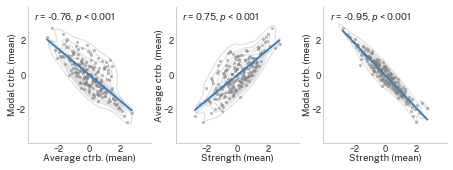

In [7]:
f, ax = plt.subplots(1, 3, figsize=(7.5, 2.5))
reg_plot(x=ac_subj_mean, y=mc_subj_mean, xlabel='Average ctrb. (mean)', ylabel='Modal ctrb. (mean)', ax=ax[0])
reg_plot(x=s_subj_mean, y=ac_subj_mean, xlabel='Strength (mean)', ylabel='Average ctrb. (mean)', ax=ax[1])
reg_plot(x=s_subj_mean, y=mc_subj_mean, xlabel='Strength (mean)', ylabel='Modal ctrb. (mean)', ax=ax[2])
plt.show()
f.savefig(os.path.join(workdir, 'docs', 'pages', 'examples', 'metric_correlations'), dpi=300, bbox_inches='tight', pad_inches=0.1)